In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Part 1: Linear Regression

### Load data

For the first part we will use a simple dataset that is available on SKlearn. You can go through the [documentation](https://scikit-learn.org/stable/datasets/index.html#boston-dataset) for more details about the. Our job is to use the Boston Housing Dataset to try and predict the price of a house given various attributes such as crime rate in the area, size etc.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names
data['PRICE'] = boston.target
# looked ugly so i changed :)
# print(data.head())
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Explore Data

#### Check if any cleaning is required

Note that this is a fairly clean dataset, regardless, it is always a good idea to see if there are any missing values and if the data types are all valid inputs for regression analysis. 

This may or may not lead to any results, but in any Data Science project it is a good idea to minimize assumptions and be sure of what you are doing. There isn't a need to overthink this, just make sure there are no surprises in the data.

**Having a look at datatype of each column**

In [3]:
# They are already float64 so don't need to convert
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

**Checking for missing values**

In [4]:
# There are no missing values so don't have to worry about them
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

#### Find out important features

Before any features are used in Linear Regression, checking for collinearity is essential. While again, this is less essential in some cases, we want to reduce computation time while still have the highest possible accuracy.

Again, note that there is no right answer to this, you will be graded on methodology and on what you plan to do with the features. In the end what matters is having a low mean squared error, and you can come back to this part again and again if you feel adding or removing a certain feature would make your model better.

Hint: There is one very common way of checking for collinearity, if you are able to quickly and efficiently visualize correlations between all variables, it would allow you to analyize this part in an easier way. Check out the [Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function in Seaborn

In [5]:
# Getting the correlation matrix from data
corr = data.corr() 

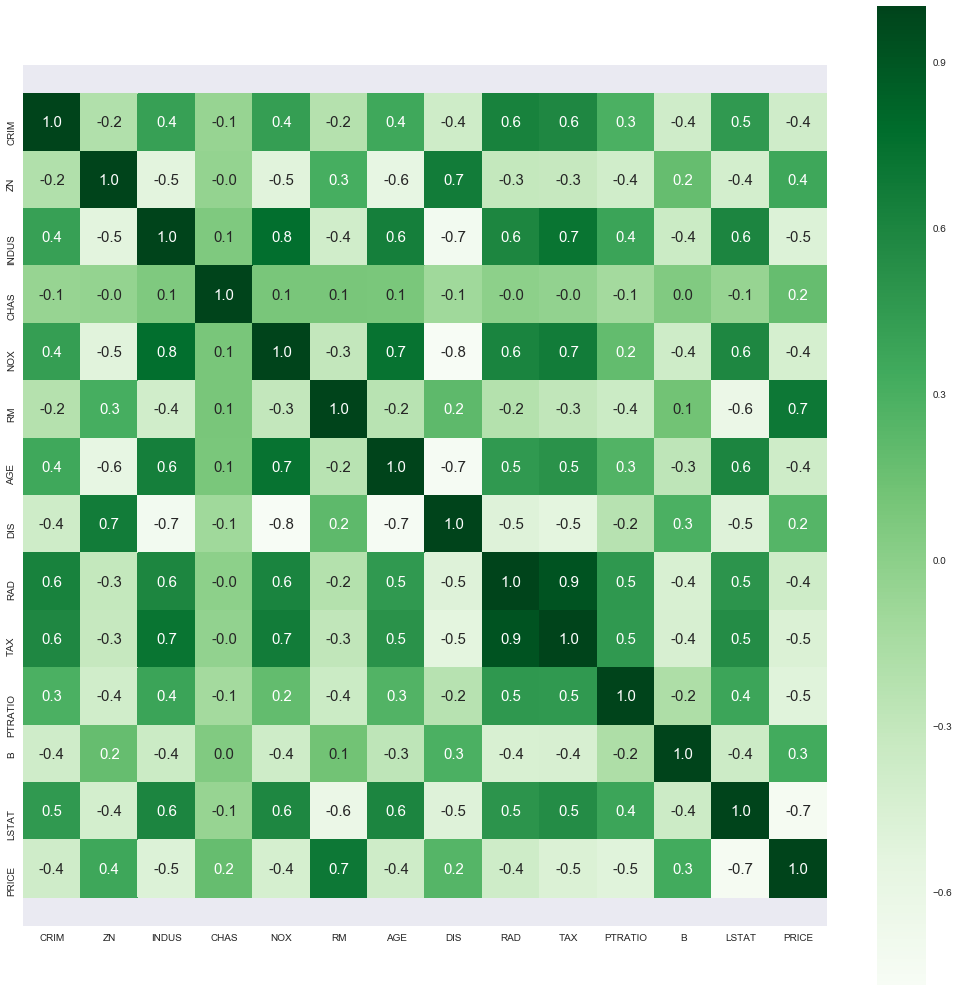

In [6]:
# The above correlation matrix can be passed directly to sns.heatmap
# This is one way of visualizing a Confusion Matrix
# Feel free to change this if you don't agree with this implementation

plt.figure(figsize=(18,18))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

#### If there are any features that should dropped, do so below, and justify your decision

**Checking for Collinear Features**

In machine learning, collinear features can lead to decreased generalization performance due to high variance and less model interpretability. Considering that we are running linear regression on 'price', our model has an assumption that all variables only have a relationship with 'price' and will not have any correlation with each other. Thereore, we should drop columns where we see a relatively larger coorrelation coefficient (preferably greater than 0.9) between any two varaibles (as long as its not with price). This will make our model more accurate.

Making a new temporary dataset which doesn't have the column 'PRICE' so we can see the correlation of other variables with each other and determine which features to remove based on their collinearity coefficents

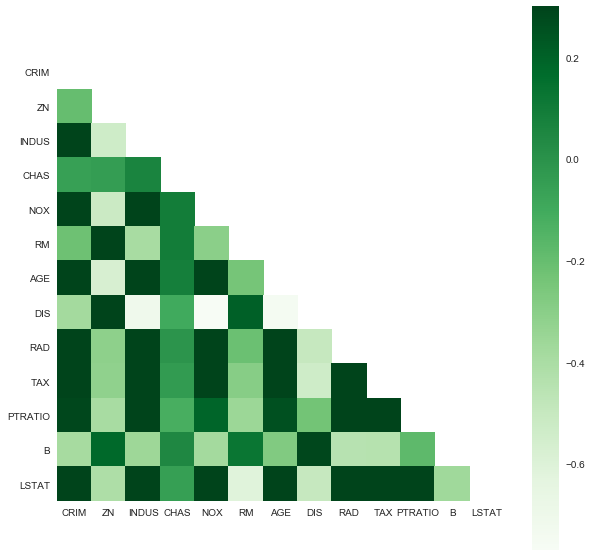

In [7]:
dataTemp = data.drop(columns = ['PRICE'])
corr = dataTemp.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap = 'Greens')

Creating correlation matrix by taking the absolute of the correalion coefficients

In [8]:
correlationMatrix = corr.abs()

Selecting the upper triangle of correlation matrix

In [9]:
upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(np.bool))
upper

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,NaN,0.200469,0.406583,0.055892,0.420972,0.219247,0.352734,0.379670,0.625505,0.582764,0.289946,0.385064,0.455621
ZN,NaN,NaN,0.533828,0.042697,0.516604,0.311991,0.569537,0.664408,0.311948,0.314563,0.391679,0.175520,0.412995
INDUS,NaN,NaN,NaN,0.062938,0.763651,0.391676,0.644779,0.708027,0.595129,0.720760,0.383248,0.356977,0.603800
CHAS,NaN,NaN,NaN,NaN,0.091203,0.091251,0.086518,0.099176,0.007368,0.035587,0.121515,0.048788,0.053929
NOX,NaN,NaN,NaN,NaN,NaN,0.302188,0.731470,0.769230,0.611441,0.668023,0.188933,0.380051,0.590879
RM,NaN,NaN,NaN,NaN,NaN,NaN,0.240265,0.205246,0.209847,0.292048,0.355501,0.128069,0.613808
AGE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747881,0.456022,0.506456,0.261515,0.273534,0.602339
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.494588,0.534432,0.232471,0.291512,0.496996
RAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910228,0.464741,0.444413,0.488676
TAX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.460853,0.441808,0.543993


Finding the feature columns with correlation coefficient greater than 0.9 and appending it to a list which contains all the columns/features we will be removing 

In [10]:
dropColumns = []
for column in upper.columns:
    for column2 in upper.columns:
        if upper[column][column2] > 0.9:
            dropColumns.append(column2)
dropColumns

['RAD']

Now that we have figured out we need to drop the column 'RAD' only, we will go ahead and simply drop it.

In [11]:
data = data.drop(columns = data[dropColumns])

Updated dataset 

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


**Checking for Single Unique Value Features**

A feature which only has one unique value won't be useful for machine learning because it has zero variance so it is better to drop such features. 

Figuring out which column only has one unique value 

In [13]:
dropColumns = []
for column in data.columns:
    NumberOfUniqueValues = data[column].unique().sum()
    if NumberOfUniqueValues == 1:
        dropColumns.append(column)
dropColumns

['CHAS']

Now that we have figured out we need to drop the column 'CHAS' only, we will go ahead and simply drop it.

In [14]:
data = data.drop(columns = data[dropColumns])

Updated dataset

In [15]:
data.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


**Missing Values Percentage**

If a specific column has a high percentage of missing values then that feature should be dropped. However, in this dataset we don't have any missing values so no column can be dropped on this base. 

In [16]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### Linear Regression

Here you will be making the SKLearn Linear Regression class. Most of the skeleton code is provided, you just have to convert the mathematical equations you have learnt in class into code. The coding in this part is very small, and ideal solutions can be done in just a few lines per function. If you take the shortcut and try to copy the solution, you will lose out on important learning. You can make helper functions if you wish. The Tutorial Notebooks can help you here - but even they don't contain the *exact and ideal* solution. 

**Note: Your solution has to be efficient**. Using simple for loops to iterate over all data-points will not earn you full marks, you should try to use vectorized versions of the equations. You have covered these in class as well, and there are plenty of online resources. The following links should help you out, but refrain from copying from them directly, **they don't contain the exact solution that can be applied to this skeleton code**

[Vectorization Implementation in Machine Learning](https://towardsdatascience.com/vectorization-implementation-in-machine-learning-ca652920c55d): Should give you a very good primer on vectorization

[Vectorized Implementation Cheat Sheet](https://medium.com/ml-ai-study-group/vectorized-implementation-of-cost-functions-and-gradient-vectors-linear-regression-and-logistic-31c17bca9181): Can be used to infer some vectorized operations

[Loss Function with Code](https://www.analyticsvidhya.com/blog/2019/08/detailed-guide-7-loss-functions-machine-learning-python-code/) take this with a grain of salt. The absolute value derivative can lead to a division by 0 if $Y - Y_{pred} = 0$

[np.where](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) can help with implementing the derivatives

**Note: Make sure you deal with exploding weights or division by zeros.** This can be done by changing the learning rates and using the right algorithms when calculating the derivatives. If you get an "overflow" error, try to **reduce the learning rate and double check your loss derivative**

In [17]:
# This is a Linear Regression class you will be implemented
# It will work similar to how SKLearn functions work
class LinearRegression():
    @staticmethod
    def mean_squared_loss(Y, Y_pred):
#       You can use this as a sample
        return np.mean((Y - Y_pred) ** 2)

### IMPLEMENT THIS FUNCTION
    @staticmethod
    def mean_abs_loss(Y, Y_pred):
        return np.mean(np.abs(Y - Y_pred))
    # mean absolute loss
   
### IMPLEMENT THIS FUNCTION
    def mean_huber_loss(self, Y_pred, Y):
        '''
        Implement Mean Huber Loss. self.huber_alpha will allow
        you to access the Huber Alpha value passed to the model
        '''
        absValue = np.abs(Y - Y_pred)
        squaredValue = (Y_pred - Y) ** 2
        returnValue = np.where(absValue < self.huber_alpha, squaredValue/2.0, self.huber_alpha*(absValue-self.huber_alpha/2.0))
        return np.mean(returnValue)
    # mean huber loss

    @staticmethod
    def der_squared_loss(X, Y, Y_pred):
####### You can use this as a sample
        return (Y_pred - Y) / float(len(X))
        
    @staticmethod
    def der_abs_loss(X, Y, Y_pred):
        '''np.where could prove handy here'''
        # Your code here
        return - np.sign(Y - Y_pred)/float(len(X))
    # mean absolute loss derivative
        
    def der_huber_loss(self, X, Y, Y_pred):
        '''np.where could prove handy here'''
        # Your code here
        return np.where(np.abs(Y-Y_pred) < self.huber_alpha, (Y_pred-Y), -self.huber_alpha*np.sign(Y-Y_pred))/float(len(X))
    # mean huber loss derivative
        
    def __init__(self, fit_intercept=True, 
                    normalize=False, loss_func= 'mse', huber_alpha=1.0,
                    max_iter=1000, learning_rate = 0.1, tol=0.001):
        '''
            This function initializes all of the variables of this class
            Pay close attention to them and try to figure out what each 
            of them mean and how to use them in the functions below
        '''
        self.weights_ = None
        self.bias_ = None
        self.max_iter_ = max_iter
        self.fit_intercept_ = fit_intercept
        self.learning_rate_ = learning_rate
        self.tol_ = tol
        self.huber_alpha = huber_alpha
        self.loss_func_ = loss_func
        self.loss_dict = {
            'mse': self.mean_squared_loss,
            'abs': self.mean_abs_loss,
            'huber': self.mean_huber_loss
        }
        self.der_dict = {
            'mse': self.der_squared_loss,
            'abs': self.der_abs_loss,
            'huber': self.der_huber_loss
        }

    def _init_weights(self, num_features):
#     '''This function initializes the weights randomly. 
#     You can chose to change this to more advances techniques
#     But they are way beyond the scope of this course'''
        self.weights_ = np.random.normal(size=(num_features,1))

#   Here we won't be using an analytical solution, but rather gradient descent
#   This is so it is easier to incorporate regularization
    def fit(self, X, Y):
        assert len(X) == len(Y), "X and Y should be of the same length"
        if self.fit_intercept_:
            X = np.concatenate((X, np.ones(shape=(len(X), 1))), axis=1)
        self._init_weights(X.shape[1])

        old_loss = np.inf
        converged = False
        for i in range(self.max_iter_):
#           Write code to get prediction
            Y_pred = X.dot(self.weights_)

########### loss functions are stored in a dictionary 
########### this saves up on many if conditions
            loss = self.loss_dict[self.loss_func_](Y, Y_pred)
########### To break when the difference in losses is very low
            if np.abs(loss - old_loss) < self.tol_:
                converged = True
                break
            old_loss = loss

########### derivative functions are also stored in a dictionary
            loss_der = self.der_dict[self.loss_func_](X, Y, Y_pred)

#           Write code to Update weights
            self.weights_ -= self.learning_rate_*np.transpose(X).dot(loss_der)
#       To check if for loop broke in the if statement or just reached max iterations
        if converged:
            print("Model Converged")
        else:
            print()
            print("Warning: Max iterations reached, model did not converge")
            
### Used to predict a Y, given an X
    def predict(self, X):
        if self.fit_intercept_:
            X = np.concatenate((X, np.ones(shape=(len(X), 1))), axis=1)
        Y_pred = X.dot(self.weights_) # Contains the same line as in the function above
        return Y_pred

    def get_coefficients(self):
        return self.weights_
    


### Applying Linear Regression to dataset

You will run into many problems such as exploding weights, division by zero. This StandardScaler will fix a lot of those problems. Read up on how and why it is used.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
Y = data[['PRICE']].to_numpy()
X = data[data.columns].to_numpy()
# We have to convert the dataframes to numpy for our implementation

scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X.shape)
print(Y.shape)

(506, 12)
(506, 1)


In [20]:
Regressor = LinearRegression(loss_func='mse')

In [21]:
Regressor.fit(X, Y)

Model Converged


### Evaluating Linear Regression

Some starter code is provided here so you guys know how to make the graphs - now it is your job to decide how to use the train and test sets to figure out if the model is good or not. 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Make predictions and calculate the Residuals from those predictions
Regressor.fit(X_train, Y_train)
Y_train_pred = Regressor.predict(X_train)
Y_test_pred = Regressor.predict(X_test)
train_residuals = Y_train - Y_train_pred
test_residuals = Y_test - Y_test_pred

print("The Mean Squared Error on train set is:", 
      mean_squared_error(Y_train, Y_train_pred))
print("The Absolute Error on train set is:", 
      mean_absolute_error(Y_train, Y_train_pred))
print("The Mean Squared Error on test set is:", 
      mean_squared_error(Y_test, Y_test_pred))
print("The Absolute Error on test set is:", 
      mean_absolute_error(Y_test, Y_test_pred))


Model Converged
The Mean Squared Error on train set is: 0.03093417626140856
The Absolute Error on train set is: 0.13497468217641467
The Mean Squared Error on test set is: 0.028733256101766167
The Absolute Error on test set is: 0.1355757847892004


**Plots for the training data**

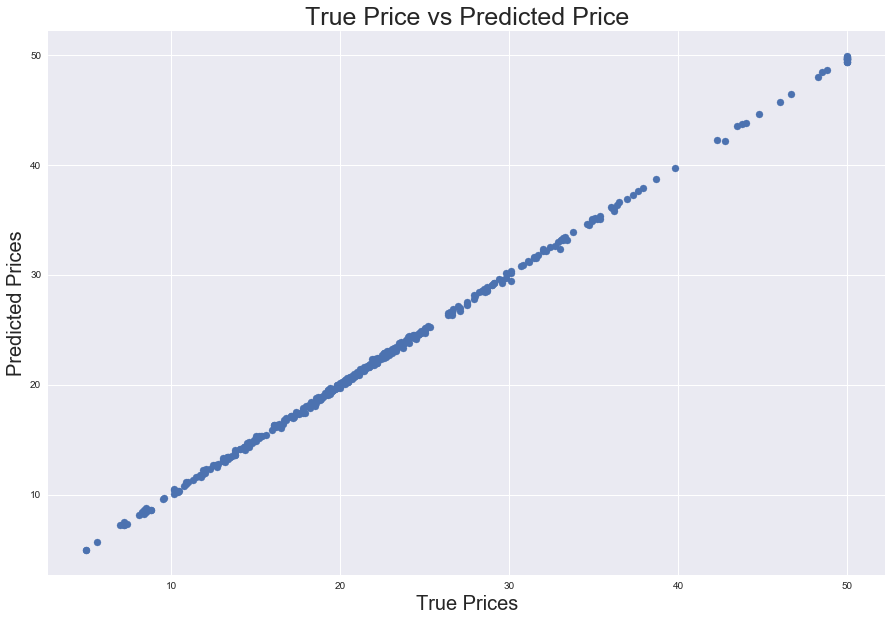

In [24]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train, Y_train_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price", size=25)
plt.show()

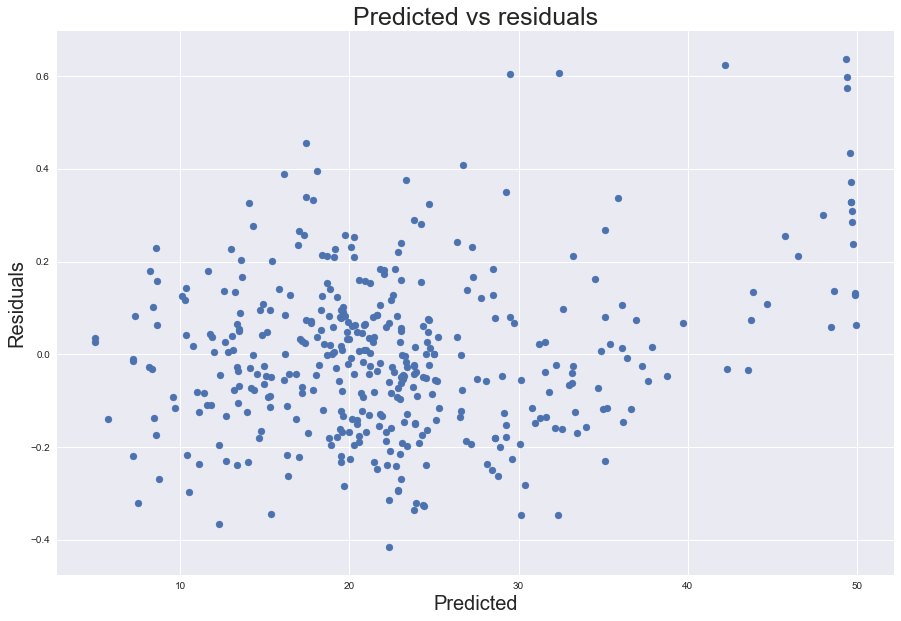

In [25]:
plt.figure(figsize=(15,10))
plt.scatter(Y_train_pred,train_residuals)
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("Predicted vs residuals", size=25)
plt.show()

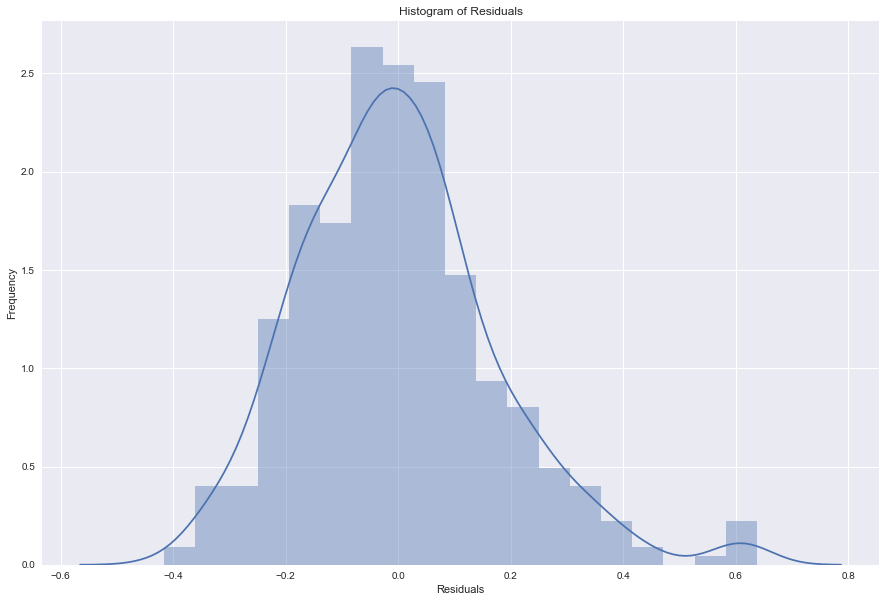

In [26]:
plt.figure(figsize=(15,10))
sns.distplot(train_residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

**Plots for the Test Data**

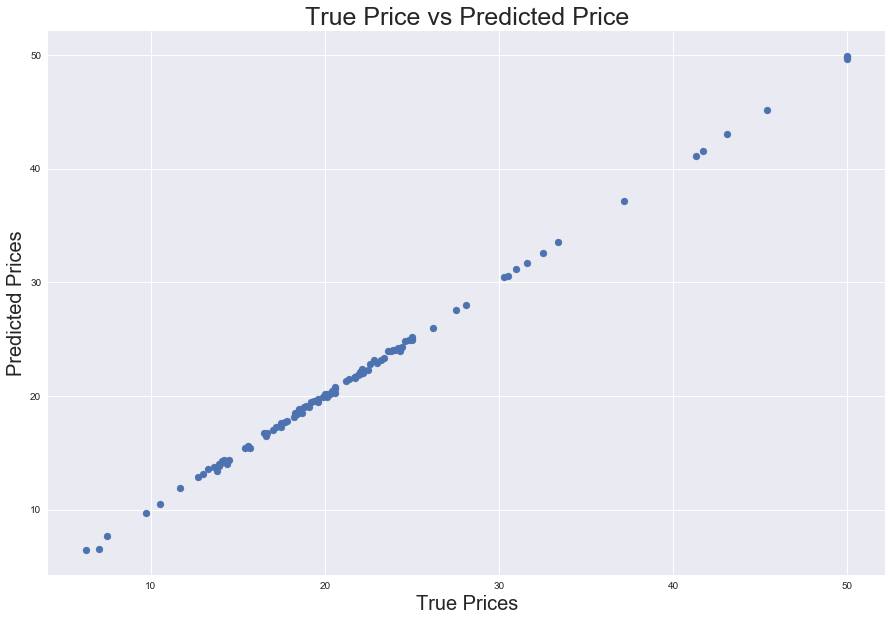

In [27]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price", size=25)
plt.show()

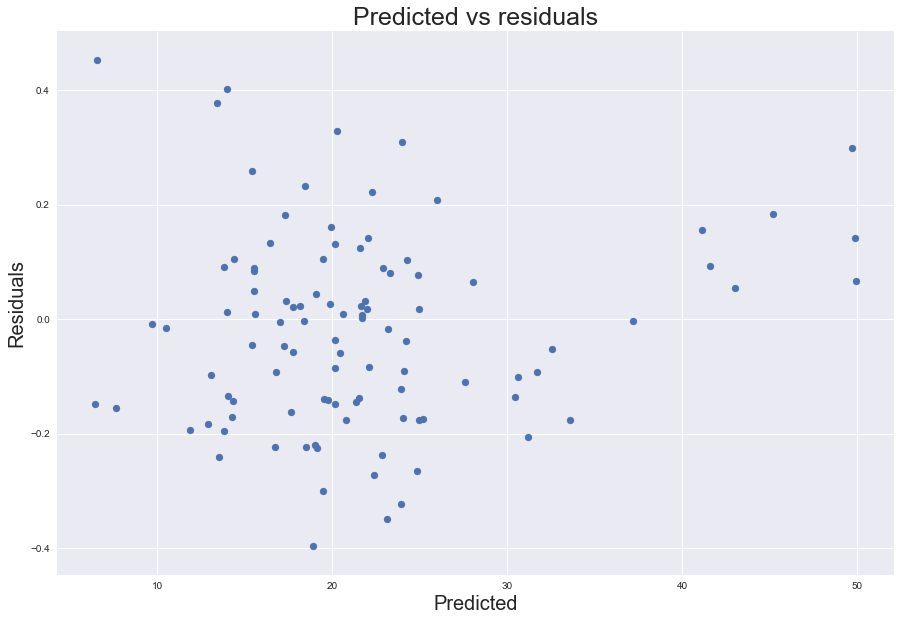

In [28]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test_pred,test_residuals)
plt.xlabel("Predicted", size=20)
plt.ylabel("Residuals", size=20)
plt.title("Predicted vs residuals", size=25)
plt.show()

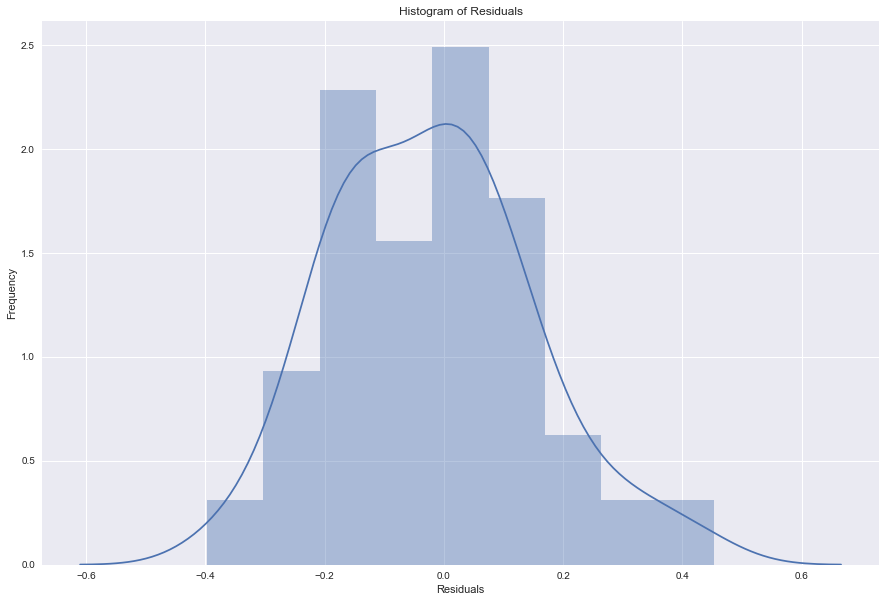

In [29]:
# Apply the above code to the test set as well to see any inconsistencies
plt.figure(figsize=(15,10))
sns.distplot(test_residuals)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#### Do you think there are any issues with the model? Are there any values or patterns seen in the previous graphs? 

**Ans:**

The purpose of looking at the residual graphs is to see whether there are any problems with the data. Finding clear patterns or trends is a sign that there is room for improvement in the model. However, the plots (both, training and test) shown above do not fit that category. They are randomly distributed and tend to cluster around the middle of our values (our data points that is) which is another sign of a good model.

Keeping in mind that the number of values in the test data are not alot, the slight differences in the histogram noted can be explained through that. 

Other than that, we do not see much of a difference between the test and train graphs which is why we can say that there is no problem with the model. We are doing linear regression and the plot does fit perfectly well.

### Using L1 Regularization and L2 Regularization

Here you'll use [L1 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html#sklearn.linear_model.LassoCV) and [L2 Regularization](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html#sklearn.linear_model.RidgeCV) from SKLearn to implement the regression. Use similar evaluation metrics as before to figure out which model has performed better. You can also use the ML Tutorial notebooks for help.

In [30]:
from sklearn.linear_model import LassoCV, RidgeCV

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(404, 12)
(404, 1)
(102, 12)
(102, 1)


In [31]:
L1_regressor = LassoCV()
L1_regressor

LassoCV(alphas=None, copy_X=True, cv='warn', eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [32]:
L2_regressor = RidgeCV()
L2_regressor

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [33]:
# Fit both your regressors
L1_regressor.fit(X_train, Y_train)
L2_regressor.fit(X_train, Y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:1100: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

### L1 Regularization

**L1 regressor errors**

In [38]:
# Use some of the graphs and metrics given above to evaluate your mod
Y_train_pred = L1_regressor.predict(X_train).reshape(len(Y_train_pred),1)
Y_test_pred =  L1_regressor.predict(X_test).reshape(len(Y_test_pred),1)
train_residuals = Y_train - Y_train_pred
test_residuals = Y_test - Y_test_pred

print("The Mean Squared Error on train set is:", 
      mean_squared_error(Y_train, Y_train_pred))
print("The Absolute Error on train set is:", 
      mean_absolute_error(Y_train, Y_train_pred))
print("The Mean Squared Error on test set is:", 
      mean_squared_error(Y_test, Y_test_pred))
print("The Absolute Error on test set is:", 
      mean_absolute_error(Y_test, Y_test_pred))

The Mean Squared Error on train set is: 8.679946034706389e-05
The Absolute Error on train set is: 0.00680149985295719
The Mean Squared Error on test set is: 7.521778193606192e-05
The Absolute Error on test set is: 0.006235682391770274


**Plotting graphs**

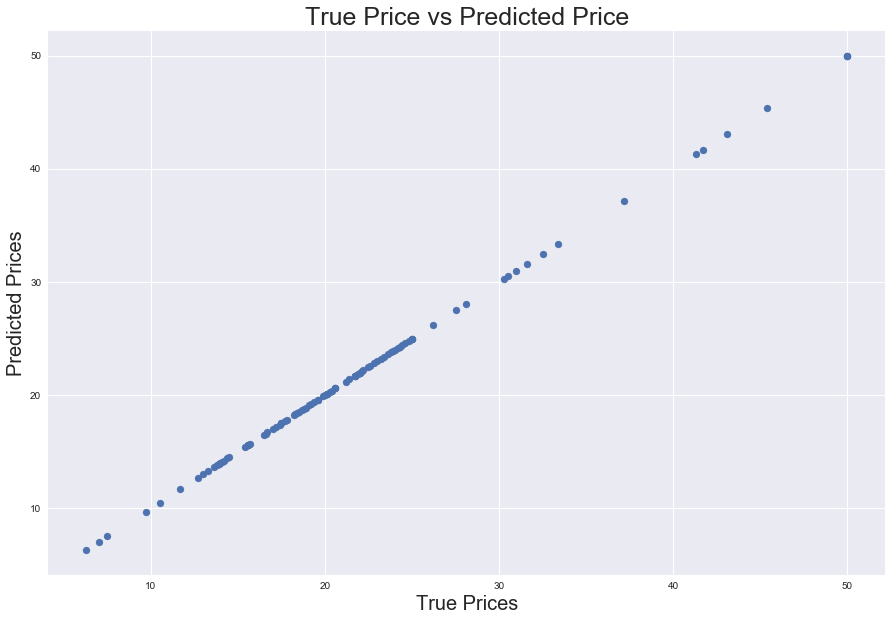

In [39]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price", size=25)
plt.show()

**L2 regressor errors**

In [41]:
Y_train_pred = L2_regressor.predict(X_train)
Y_test_pred =  L2_regressor.predict(X_test)
train_residuals = Y_train - Y_train_pred
test_residuals = Y_test - Y_test_pred

print("The Mean Squared Error on train set is:", 
      mean_squared_error(Y_train, Y_train_pred))
print("The Absolute Error on train set is:", 
      mean_absolute_error(Y_train, Y_train_pred))
print("The Mean Squared Error on test set is:", 
      mean_squared_error(Y_test, Y_test_pred))
print("The Absolute Error on test set is:", 
      mean_absolute_error(Y_test, Y_test_pred))

The Mean Squared Error on train set is: 1.761059018986264e-05
The Absolute Error on train set is: 0.002886766438010388
The Mean Squared Error on test set is: 1.362481422114153e-05
The Absolute Error on test set is: 0.002857186891582755


**Plotting graphs**

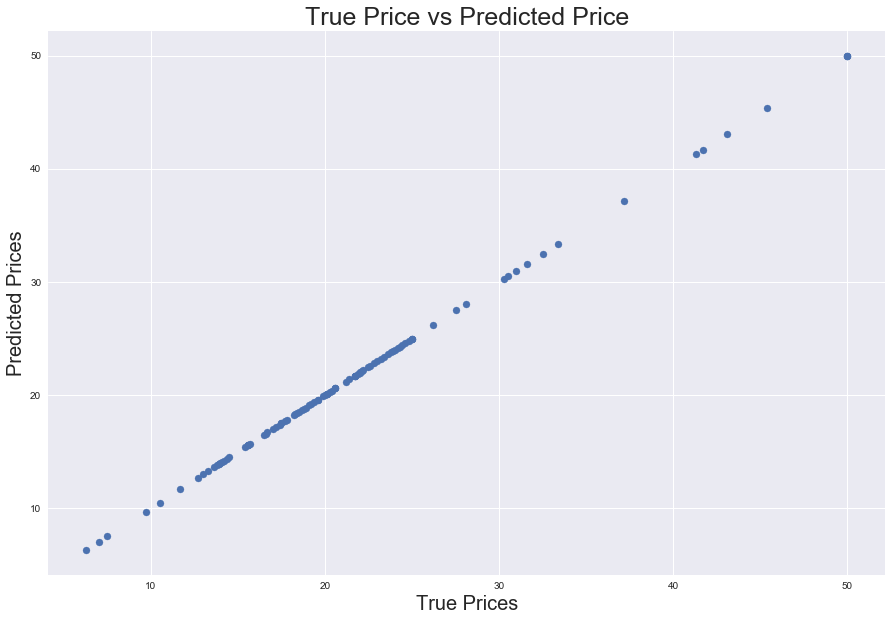

In [42]:
plt.figure(figsize=(15,10))
plt.scatter(Y_test, Y_test_pred)
plt.xlabel("True Prices", size=20)
plt.ylabel("Predicted Prices", size=20)
plt.title("True Price vs Predicted Price", size=25)
plt.show()

## Descriptive Questions

#### Question 1: Which model performed better? Why do you say it was better?

**Ans:**

L2 performed the best because of how it showed the least mean squared error. However, L1 still performed better than our model which is quite understandable considering how our model did not have any sort of optimizations

#### Question 2

Suppose we estimate the regression coefficients in a linear regression model by minimizing

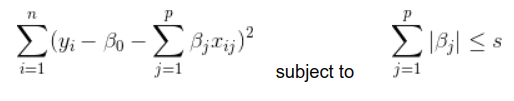

for a particular value of s. For each of the following indicate which one of i. through v. is correct.  Justify your answer.

i. Increase initially, and then eventually start decreasing in an inverted U shape.

ii. Decrease initially, and then eventually start increasing in  a U shape.

iii. Steadily increase.

iv. Steadily decrease.

v. Remain constant


#### Question 3:
**As, we increase s from 0**, explains what happens to each of the following: (a)  training RSS,  (b) test RSS, and (c) variance

**Ans:**

(a) Training RSS:
As we increase s from 0, the value of the beta coefficient would tend to increase, which would in turn decrease the restriction on the weights. As a result, the model would tend to fit the training model increasingly causing the RSS to steadily decrease.
The answer to this would be: (iv)

(b) Test RSS:
As we increase s from 0, the value of the beta coefficient would tend to increase, which would in turn decrease the restriction on the weights. As a result, the model is becoming more and more flexible and so there will come a point in our test data where the RSS no longer fits. The RSS would then start to increase because overfitting will start to come into play.
The answer to this would be: (ii)

(c) Variance:
As the bias-variance tradeoff suggests, a more flexible model would decrease bias and increase variance.
The answer to this would be: (iii)

#### Question 4:

Suppose we estimate the regression coefficients in a linear regression model by minimizing

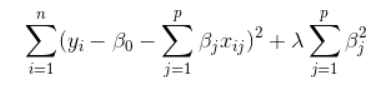

for a particular value of 𝛌. For each of the following indicate which one of i. through v. is correct.  Justify your answer.

i. Increase initially, and then eventually start decreasing in an inverted U shape.

ii. Decrease initially, and then eventually start increasing in  a U shape.

iii. Steadily increase.

iv. Steadily decrease.

v. Remain constant


**As, we increase  𝛌 from 0**, explains what happens to each of the following: (a)  training RSS,  (b) test RSS, and (c) variance


**Ans:**

(a) Training RSS: Increasing the value of this coefficient, in this case, would increase the restriction on the weights causing the model to become less and less flexible. This then would result in the training RSS steadily increasing.
The answer would then be: (iii)

(b) Test RSS: As we increase s from 0, the value of the beta coefficient would tend to increase, which would in turn decrease the restriction on the weights. As a result, the model is becoming more and more flexible and so there will come a point in our test data where the RSS no longer fits. The RSS would then start to increase because overfitting will start to come into play.
The answer to this would be: (ii)

(c) Variance: According to the variance-bias tradeoff, a decrease in flexibility means an increase in bias which would decrease variance.
The answer would then be: (iv)

## Part 2: Logistic Regression
Here you will be working on a classification problem from a dataset that we load from sklearn. Logistic Regression uses almost the same algorithm as Linear Regression with Gradient Descent, but the final output has a Sigmoid (Or a Softmax) *Activation Function* applied to it. Don't worry if you do not understand what this means, all you need to know is converts a continuous output into a Probability Distribution between 0 and 1.

[This link](https://www.datacamp.com/community/tutorials/understanding-logistic-regression-python) will teach you everything you need to know about Logistic Regression and applying it to this problem below.


**The Problem:** Given a piece of text, you want to classify it into one of four categories: 
1. Alternate-Atheism 
2. Religious - Christian 
3. Computer-Graphics
4. Scientific-Medicine

You will have to feature engineer the raw input into a more suitable input for logistic regression

### Dataset Loading

In [44]:
from sklearn.datasets import fetch_20newsgroups

In [45]:
# Only four categories are loaded to keep the dataset size manageable
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
dataset = fetch_20newsgroups(subset='all', categories=categories)
target_names = dataset.target_names

X = dataset.data
Y = dataset.target
print("X is of length:", len(X), '\n')
print("All labels are:", np.unique(Y))
print("This label corresponds to:", target_names[Y[0]])

X is of length: 3759 

All labels are: [0 1 2 3]
This label corresponds to: sci.med


In [46]:
print("First datapoint:", X[0])

First datapoint: From: geb@cs.pitt.edu (Gordon Banks)
Subject: Re: "CAN'T BREATHE"
Article-I.D.: pitt.19440
Reply-To: geb@cs.pitt.edu (Gordon Banks)
Organization: Univ. of Pittsburgh Computer Science
Lines: 23

In article <1993Mar29.204003.26952@tijc02.uucp> pjs269@tijc02.uucp (Paul Schmidt) writes:
>I think it is important to verify all procedures with proper studies to
>show their worthiness and risk.  I just read an interesting tidbit that 
>80% of the medical treatments are unproven and not based on scientific 
>fact.  For example, many treatments of prostate cancer are unproven and
>the treatment may be more dangerous than the disease (according to the
>article I read.)

Where did you read this?  I don't think this is true.  I think most
medical treatments are based on science, although it is difficult
to prove anything with certitude.  It is true that there are some
things that have just been found "to work", but we have no good
explanation for why.  But almost everything does ha

### Feature Engineering + Preprocessing

Your best friend is the [Scikit-Learn CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer). YOu can use to carry out the feature extraction. It has an in-built feature for n-gram vectorization as well. Do check out the documentation to figure out how to use simple Bag of Words and N-Gram vectorization. 

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

#### Using Bag of Words Representation

In [48]:
# Choose the right arguments 
BoW_vectorizer = CountVectorizer(stop_words="english", max_features=10000)
BoW_features = BoW_vectorizer.fit(X).transform(X) # Get BoW from SKlearn CountVectorizer and store in variable

#### Using N-Gram Representation

In [49]:
# Choose the right arguments
NGram_vectorizer = CountVectorizer(ngram_range = (2,2), max_features=10000)
NGram_features = NGram_vectorizer.fit(X).transform(X) # Get N-Gram from SKlearn CountVectorizer and store in variable

### Logistic Regression
Here you'll be using the [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html#sklearn.linear_model.LogisticRegressionCV) library from SKlearn (this one uses in-built cross validation as well). This part is open-ended and meant for you to explore how to change hyperparameters to get a good result. The coding here is simple - the only job you have to do is look at the documentation

In [50]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [51]:
# Carry out regression using SKLearn. Check the tutorials for tips
x_train, x_test, y_train, y_test = train_test_split(BoW_features,Y,test_size=0.2)
BoW_classifier = LogisticRegressionCV(cv=5, multi_class='multinomial')
BoW_classifier = BoW_classifier.fit(x_train, y_train)

x_train1, x_test1, y_train1, y_test1 = train_test_split(NGram_features,Y,test_size=0.2)
NGram_classifier = LogisticRegressionCV(cv=5, multi_class='multinomial')
NGram_classifier = NGram_classifier.fit(x_train1, y_train1)

# Write code here to get predictions
y_pred_bow = BoW_classifier.predict(x_test)
y_pred_ngram = NGram_classifier.predict(x_test1)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### Evaluation
Use scikit-learn's [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) and [confusion_matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py) to to see how good your models are. You can use the functions provided in the documentation. Data Science is about finding the right libraries to do the job, and again, the coding is simple, your job is to find the right functions.

In [52]:
from sklearn.metrics import accuracy_score

**Printing accuracy scores**

In [53]:
# Write code to evaluate both models to see which which one performed better
acc_bow = accuracy_score(y_test, y_pred_bow)
acc_NG = accuracy_score(y_test1, y_pred_ngram)
print("BagOfWords Accuracy: ", acc_bow)
print("NGram Accuracy: ", acc_NG)

BagOfWords Accuracy:  0.9574468085106383
NGram Accuracy:  0.898936170212766


**Making confusion matrices for both models**

In [54]:
# Write code to evaluate both models to see which which one performed better
matrix_bow = metrics.confusion_matrix(y_test, y_pred_bow)
matrix_NG = metrics.confusion_matrix(y_test1, y_pred_ngram)

**Confusion matrix for the Bag of Words model**

Text(0.5, 257.44, 'Predicted label')

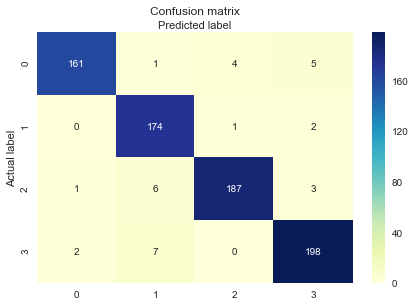

In [55]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(BoW_vectorizer.get_feature_names()))
plt.xticks(tick_marks, BoW_vectorizer.get_feature_names())
plt.yticks(tick_marks, BoW_vectorizer.get_feature_names())
# create heatmap
sns.heatmap(pd.DataFrame(matrix_bow), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Confusion matrix for the NGram model**

Text(0.5, 257.44, 'Predicted label')

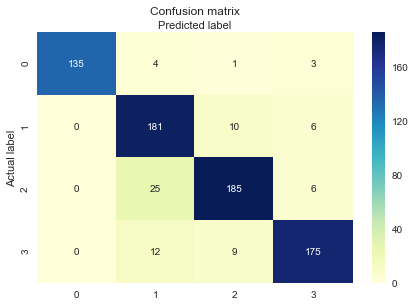

In [56]:
fig, ax = plt.subplots()
tick_marks = np.arange(len(NGram_vectorizer.get_feature_names()))
plt.xticks(tick_marks, NGram_vectorizer.get_feature_names())
plt.yticks(tick_marks, NGram_vectorizer.get_feature_names())
# create heatmap
sns.heatmap(pd.DataFrame(matrix_NG), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Which model was better? Why? Answer in terms of accuracy score and confusion matrix values

**Ans:**

In terms of the accuracy scores, the Bag of Words model is more accurate but we should also keep in mind that the maximum number of iterations were limited to 10000 because of how it takes alot of time for the NGram model otherwise. Theoretically, the NGram model captures the words in a better way by dealing with multiple words in the same phrase and so can capture more information but this comes at a cost as bag of n-grams can produce a much larger and sparser feature set than bag of words. However, considering the statistics, this then means that because of the sparsity and complexity, the bag of words is actually more accurate in terms of feasibility. 

When we look at the confusion matrix, the labels correpond to the categories and the diagonal values show the correct predictions. Generally, the bag of words model shows greater values across the diagonal which supports the higher accuracy score. 

All in all, the bag of words model has a relatively greater accuracy. This *could* be because of the limited number of features which means that the NGram model did not have a fair chance and so the bag of words model is getting relatively more features. 